<a href="https://colab.research.google.com/github/javachka11/SentimentAnalysis_2021/blob/main/bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/NLP/positive.csv.zip' -d '/content/drive/My Drive/NLP'

Archive:  /content/drive/My Drive/NLP/negative.csv.zip
  inflating: /content/drive/My Drive/NLP/negative.csv  


In [ ]:
!unzip '/content/drive/My Drive/NLP/negative.csv.zip' -d '/content/drive/My Drive/NLP'

In [ ]:
texts = []
labels = []

In [ ]:
import csv
with open("/content/drive/My Drive/NLP/positive.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader((x.replace('\0', '') for x in r_file), delimiter = ";")
    count = 0
    for row in file_reader:
        if count == 0:
            print(f'Файл содержит столбцы: {", ".join(row)}')
        else:
            texts.append(row[3])
            labels.append(1)
        count += 1
    print(f'Всего в файле {count} строк.')

Файл содержит столбцы: 408906762813579264, 1386325944, dugarchikbellko, на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:, -1, 0, 0, 0, 8064, 111, 94, 2
Всего в файле 111923 строк.


In [ ]:
with open("/content/drive/My Drive/NLP/negative.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader((x.replace('\0', '') for x in r_file), delimiter = ";")
    count = 0
    for row in file_reader:
        if count == 0:
            print(f'Файл содержит столбцы: {", ".join(row)}')
        else:
            texts.append(row[3])
            labels.append(0)
        count += 1
    print(f'Всего в файле {count} строк.')

In [ ]:
len(texts), len(labels)

(226832, 226832)

In [ ]:
import re

def preprocess_text(text):
    text = re.sub('[xX\:\;][dD\)]+', '', text)
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]*)|(https?://[^\s]*))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub('\&[^\s]+', '', text)
    text = re.sub('[^a-zA-Zа-яА-Я0-9]+', ' ', text)
    text = re.sub('[rR][tT]', '', text)
    text = re.sub(' +', ' ', text)
    return text.strip()

texts2 = [preprocess_text(t) for t in texts]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
max_words = 50000
max_len = 25
training_samples = 160000
validation_samples = 40000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts2)
sequences = tokenizer.texts_to_sequences(texts2)
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = '/content/drive/My Drive/NLP/best_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
stop_callback = EarlyStopping(
    monitor="val_acc",
    mode='max',
    patience=3,
    min_delta=0.001
)
callbacks = [checkpoint_callback, stop_callback]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len, mask_zero = True))
model.add(layers.SpatialDropout1D(0.3))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 128)           6400000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 25, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 6,540,097
Trainable params: 6,540,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=20,
batch_size=200,
validation_data=(x_val, y_val),
callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
800/800 [==============================] - 218s 259ms/step - loss: 0.6160 - acc: 0.6671 - val_loss: 0.5578 - val_acc: 0.7187
Epoch 2/20
800/800 [==============================] - 207s 258ms/step - loss: 0.5301 - acc: 0.7366 - val_loss: 0.5234 - val_acc: 0.7380
Epoch 3/20
800/800 [==============================] - 205s 256ms/step - loss: 0.5008 - acc: 0.7559 - val_loss: 0.5122 - val_acc: 0.7436
Epoch 4/20
800/800 [==============================] - 204s 255ms/step - loss: 0.4852 - acc: 0.7665 - val_loss: 0.5059 - val_acc: 0.7472
Epoch 5/20
800/800 [==============================] - 205s 256ms/step - loss: 0.4737 - acc: 0.7744 - val_loss: 0.5054 - val_acc: 0.7494
Epoch 6/20
800/800 [==============================] - 205s 256ms/step - loss: 0.4655 - acc: 0.7790 - val_loss: 0.5030 - val_acc: 0.7498
Epoch 7/20
800/800 [==============================] - 204s 256ms/step - loss: 0.4588 - acc: 0.7827 - val_loss: 0.5013 - val_acc: 0.7520
Epoch 8/20
800/800 [============================

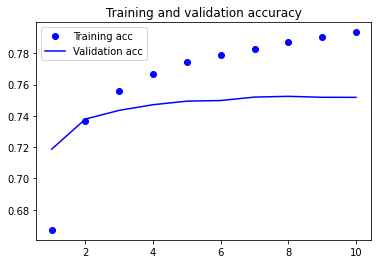

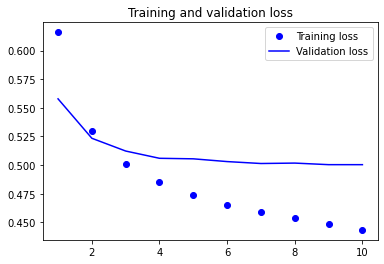

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_samples = 20000
x_test = data[training_samples + validation_samples: training_samples + validation_samples + test_samples]
y_test = labels[training_samples + validation_samples: training_samples + validation_samples + test_samples]
results = model.evaluate(x_test, y_test, batch_size=100)
print('test_loss : test_acc ==', results)

200/200 [==============================] - 11s 40ms/step - loss: 0.4955 - acc: 0.7592
test_loss : test_acc == [0.49552929401397705, 0.7592499852180481]


In [ ]:
import pickle

#Сохраняем обученный tokenizer, чтобы использовать его в других программах
with open('/content/drive/My Drive/NLP/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
text = 'мне не понравилось, пока'
sequence = tokenizer.texts_to_sequences([text])
print(model.predict(sequence))

[[0.3651166]]
